## Quantium Virtual Internship - Retail Strategy and Analytics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_customer = pd.read_csv("QVI_purchase_behaviour.csv")
data_customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


### In QVI_purchase_behaviour file we have 72637 rows and 3 columns

In [6]:
data_purchase = pd.read_excel("QVI_transaction_data.xlsx")
data_purchase

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### In QVI_transaction_data file we have 264836 rows and 8 columns

<b> Purchase behviour information </b>

In [9]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<b> Transaction data information </b>

In [11]:
data_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


#### Replacing chp word with Chip in PROD_NAME column

In [13]:
data_purchase['PROD_NAME'] = data_purchase['PROD_NAME'].str.replace('Chp', 'Chip', case=False)
data_chip = data_purchase[data_purchase['PROD_NAME'].str.contains('Chip')]
data_chip

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta 150g,1,4.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


In [14]:
data_chip

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta 150g,1,4.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


<b> Value counts in PROD_NAME column </b>

In [16]:
data_chip['PROD_NAME'].value_counts()

PROD_NAME
Kettle Tortilla ChipsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g     3269
Cobs Popd Sea Salt  Chips 110g               3265
Smiths Crnkle Chip  Orgnl Big Bag 380g       3233
Thins Potato Chips  Hot & Spicy 175g         3229
Doritos Corn Chips  Cheese Supreme 170g      3217
Doritos Corn Chip Mexican Jalapeno 150g      3204
Smiths Crinkle Chips Salt & Vinegar 330g     3197
Thins Chips Light&  Tangy 175g               3188
Dorito Corn Chip     Supreme 380g            3185
Doritos Corn Chip Southern Chicken 150g      3172
Doritos Corn Chips  Nacho Cheese 170g        3160
Cobs Popd Sour Crm  &Chives Chips 110g       3159
Kettle Tortilla ChipsBtroot&Ricotta 150g     3146
Tostitos Smoked     Chipotle 175g            3145
Kettle Tortilla ChipsFeta&Garlic 150g        3138
Doritos Corn Chips  Original 170g            3121
Thins Chips Seasonedchicken 175g             3114
Thins Chips Salt &  Vinegar 175g             3103
Smiths Chip Thinly  Cut Original 175g   

<b> data_chip dataset description </b>

In [18]:
data_chip.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,87335,87335.000000,8.733500e+04,87335.000000,87335.000000,87335.000000,87335.000000
mean,2018-12-29 21:06:07.893742336,135.525185,1.360239e+05,135604.567127,49.949619,1.910620,7.286420
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,2018-09-30 00:00:00,70.000000,7.010000e+04,68056.500000,16.000000,2.000000,6.000000
50%,2018-12-29 00:00:00,131.000000,1.314830e+05,135822.000000,42.000000,2.000000,6.600000
75%,2019-03-31 00:00:00,203.000000,2.032830e+05,203488.000000,78.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,270209.000000,111.000000,200.000000,650.000000
std,NaN,76.853472,8.095134e+04,78071.398801,34.450103,1.007451,3.943887


<b> We can see in the description that in the PROD_QTY column, the maximum packet bought is 200, let's find out the reason. </b>

<Axes: xlabel='PROD_QTY', ylabel='TXN_ID'>

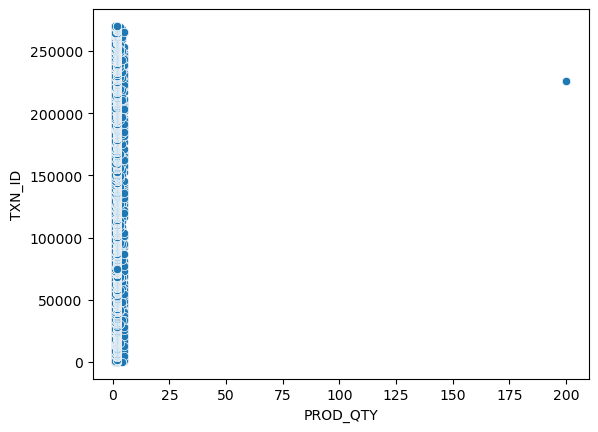

In [20]:
sns.scatterplot(x=data_chip['PROD_QTY'], y=data_chip['TXN_ID'])

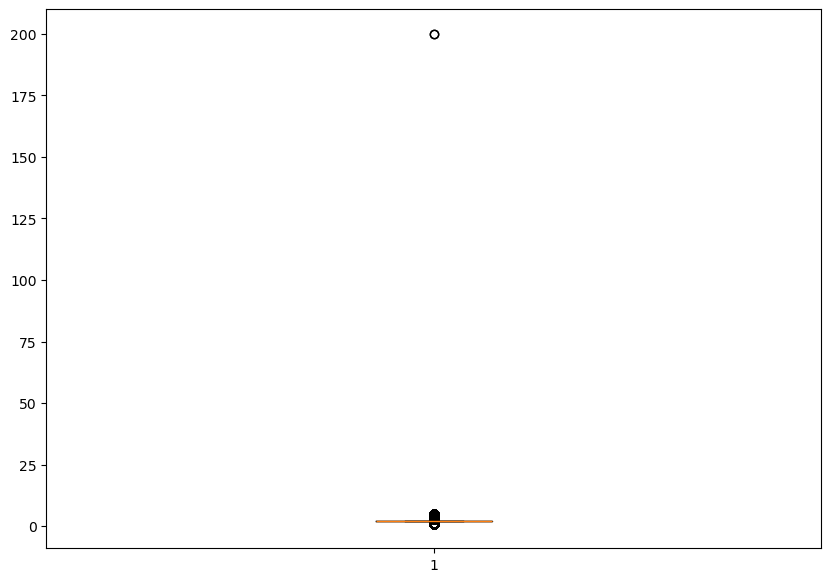

In [21]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_chip['PROD_QTY'])
plt.show()

### Using boxplot and scatterplot we can see the outlier in PROD_QTY 

<b> Same card no. used for other transactions with same qty </b>

In [24]:
data_chip[data_chip['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chip Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chip Supreme 380g,200,650.0


### Two transactions made for qty 200

<b> We'll remove this card number from the dataset for further analysis </b>

In [27]:
data_chip.drop([69762, 69763], inplace=True)
data_chip

C:\Users\suskr\AppData\Local\Temp\ipykernel_16268\911433495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chip.drop([69762, 69763], inplace=True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta 150g,1,4.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


In [28]:
data_chip[data_chip['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


### Removed the loyalty card number for further analysis

<b> Number of transactions for each date </b>

In [31]:
data_grouped = data_chip.groupby('DATE').count().reset_index()
data_grouped[['DATE', 'TXN_ID']]

,DATE,TXN_ID
0,2018-07-01,198
1,2018-07-02,224
2,2018-07-03,238
3,2018-07-04,225
4,2018-07-05,243
...,...,...
359,2019-06-26,223
360,2019-06-27,212
361,2019-06-28,272
362,2019-06-29,247


<b> Separating year, month and day from the DATE column for further analysis </b>

In [33]:
data_grouped['month'] = data_grouped['DATE'].dt.year
data_grouped.drop(columns='month', inplace=True)

In [34]:
data_grouped

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,198,198,198,198,198,198,198
1,2018-07-02,224,224,224,224,224,224,224
2,2018-07-03,238,238,238,238,238,238,238
3,2018-07-04,225,225,225,225,225,225,225
4,2018-07-05,243,243,243,243,243,243,243
...,...,...,...,...,...,...,...,...
359,2019-06-26,223,223,223,223,223,223,223
360,2019-06-27,212,212,212,212,212,212,212
361,2019-06-28,272,272,272,272,272,272,272
362,2019-06-29,247,247,247,247,247,247,247


In [35]:
data_grouped['MONTH'] = data_grouped['DATE'].dt.month
data_grouped

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH
0,2018-07-01,198,198,198,198,198,198,198,7
1,2018-07-02,224,224,224,224,224,224,224,7
2,2018-07-03,238,238,238,238,238,238,238,7
3,2018-07-04,225,225,225,225,225,225,225,7
4,2018-07-05,243,243,243,243,243,243,243,7
...,...,...,...,...,...,...,...,...,...
359,2019-06-26,223,223,223,223,223,223,223,6
360,2019-06-27,212,212,212,212,212,212,212,6
361,2019-06-28,272,272,272,272,272,272,272,6
362,2019-06-29,247,247,247,247,247,247,247,6


In [36]:
data_grouped['YEAR'] = data_grouped['DATE'].dt.year
data_grouped

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,YEAR
0,2018-07-01,198,198,198,198,198,198,198,7,2018
1,2018-07-02,224,224,224,224,224,224,224,7,2018
2,2018-07-03,238,238,238,238,238,238,238,7,2018
3,2018-07-04,225,225,225,225,225,225,225,7,2018
4,2018-07-05,243,243,243,243,243,243,243,7,2018
...,...,...,...,...,...,...,...,...,...,...
359,2019-06-26,223,223,223,223,223,223,223,6,2019
360,2019-06-27,212,212,212,212,212,212,212,6,2019
361,2019-06-28,272,272,272,272,272,272,272,6,2019
362,2019-06-29,247,247,247,247,247,247,247,6,2019


In [37]:
data_grouped['DAY'] = data_grouped['DATE'].dt.day
data_grouped

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,YEAR,DAY
0,2018-07-01,198,198,198,198,198,198,198,7,2018,1
1,2018-07-02,224,224,224,224,224,224,224,7,2018,2
2,2018-07-03,238,238,238,238,238,238,238,7,2018,3
3,2018-07-04,225,225,225,225,225,225,225,7,2018,4
4,2018-07-05,243,243,243,243,243,243,243,7,2018,5
...,...,...,...,...,...,...,...,...,...,...,...
359,2019-06-26,223,223,223,223,223,223,223,6,2019,26
360,2019-06-27,212,212,212,212,212,212,212,6,2019,27
361,2019-06-28,272,272,272,272,272,272,272,6,2019,28
362,2019-06-29,247,247,247,247,247,247,247,6,2019,29


<BarContainer object of 364 artists>

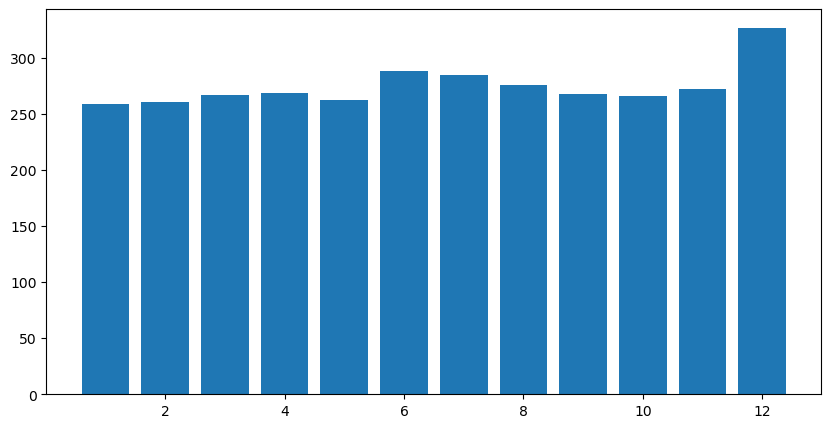

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data_grouped['MONTH'], data_grouped['TXN_ID'])

### Number of sales occured most in december month

<BarContainer object of 364 artists>

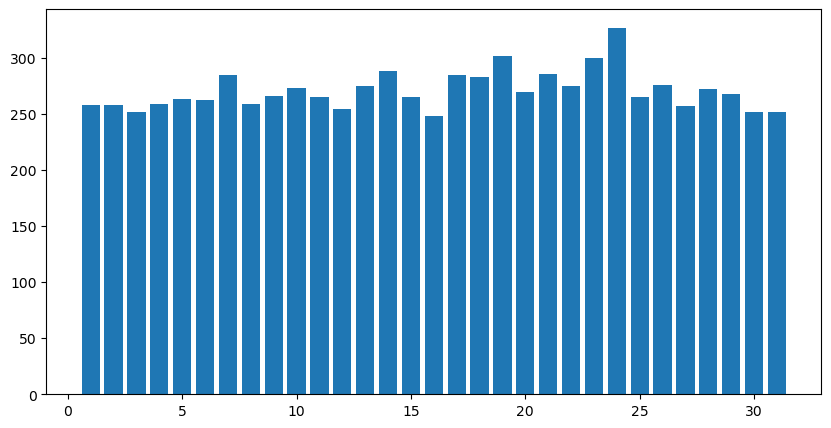

In [40]:
fig = plt.figure(figsize = (10, 5))
plt.bar(data_grouped['DAY'], data_grouped['TXN_ID'])

### We can see in december month around christmas we have max sales

In [42]:
data_chip

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta 150g,1,4.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


In [43]:
data_chip['SIZE'] = data_chip['PROD_NAME'].str[-4:]
data_chip

C:\Users\suskr\AppData\Local\Temp\ipykernel_16268\3072499435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chip['SIZE'] = data_chip['PROD_NAME'].str[-4:]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8,150g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g
...,...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110g
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta 150g,1,4.6,150g
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110g
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175g


In [44]:
data_chip['PROD_NAME'] = data_chip['PROD_NAME'].str[:-4]
data_chip

C:\Users\suskr\AppData\Local\Temp\ipykernel_16268\3038674784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chip['PROD_NAME'] = data_chip['PROD_NAME'].str[:-4]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili,3,13.8,150g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330g
...,...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,110g
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta,1,4.6,150g
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,110g
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,175g


In [45]:
data_chip['SIZE'].value_counts()

SIZE
175g    29215
150g    15956
170g    15413
110g     9693
380g     6416
200g     4473
330g     3197
160g     2970
Name: count, dtype: int64

In [46]:
data_chip['SIZE'] = data_chip['SIZE'].str[:-1]
data_chip

C:\Users\suskr\AppData\Local\Temp\ipykernel_16268\1766603709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chip['SIZE'] = data_chip['SIZE'].str[:-1]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili,3,13.8,150
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330
...,...,...,...,...,...,...,...,...,...
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,110
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChipsBtroot&Ricotta,1,4.6,150
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,110
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,175


In [47]:
data_chip['SIZE'].value_counts()

SIZE
175    29215
150    15956
170    15413
110     9693
380     6416
200     4473
330     3197
160     2970
Name: count, dtype: int64

In [48]:
data_chip['SIZE'] = data_chip['SIZE'].apply(pd.to_numeric)
data_chip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87333 entries, 0 to 264834
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            87333 non-null  datetime64[ns]
 1   STORE_NBR       87333 non-null  int64         
 2   LYLTY_CARD_NBR  87333 non-null  int64         
 3   TXN_ID          87333 non-null  int64         
 4   PROD_NBR        87333 non-null  int64         
 5   PROD_NAME       87333 non-null  object        
 6   PROD_QTY        87333 non-null  int64         
 7   TOT_SALES       87333 non-null  float64       
 8   SIZE            87333 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 6.7+ MB


C:\Users\suskr\AppData\Local\Temp\ipykernel_16268\3428170374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chip['SIZE'] = data_chip['SIZE'].apply(pd.to_numeric)


### Changed SIZE column to numeric

In [50]:
data_chip['SIZE'].describe()

count    87333.000000
mean       183.840644
std         67.201016
min        110.000000
25%        150.000000
50%        170.000000
75%        175.000000
max        380.000000
Name: SIZE, dtype: float64

### MIN - 110 and MAX - 380

(array([ 9693., 18926., 44628.,  4473.,     0.,     0.,     0.,     0.,
         3197.,  6416.]),
 array([110., 137., 164., 191., 218., 245., 272., 299., 326., 353., 380.]),
 <BarContainer object of 10 artists>)

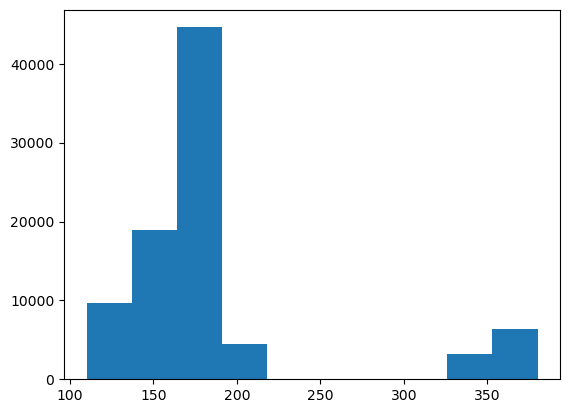

In [52]:
x = data_chip['SIZE']
plt.hist(x)

### Analysis on purchase behaviour

In [54]:
data_customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [55]:
data_purchase

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [56]:
data_merge = data_purchase.merge(data_customer, on='LYLTY_CARD_NBR')
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


### Joined two tables using LYLTY_CARD_NBR column

In [58]:
data_merge.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [59]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [60]:
data_premium = data_merge[['TOT_SALES', 'PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES']

In [61]:
data_lifestage = data_merge[['TOT_SALES', 'LIFESTAGE']].groupby('LIFESTAGE').sum()['TOT_SALES']

In [62]:
data_premium = pd.DataFrame(data_premium).reset_index()

### Grouped PREMIUM_CUSTOMER and sum their Total sales

In [64]:
data_premium

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,507458.95


In [65]:
data_premium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PREMIUM_CUSTOMER  3 non-null      object 
 1   TOT_SALES         3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


<Axes: xlabel='PREMIUM_CUSTOMER', ylabel='TOT_SALES'>

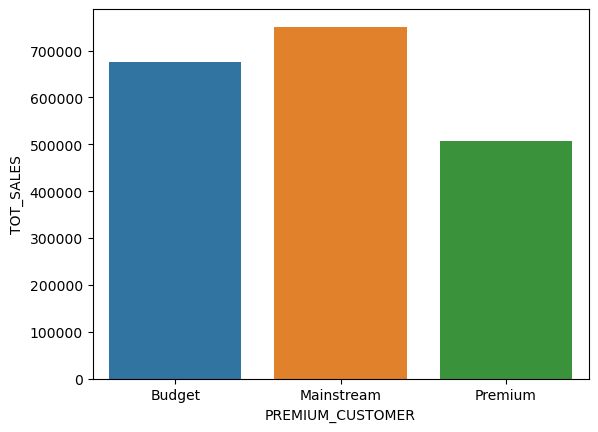

In [66]:
sns.barplot(x=data_premium['PREMIUM_CUSTOMER'],y=data_premium['TOT_SALES'])

In [67]:
data_lifestage = pd.DataFrame(data_lifestage).reset_index()

### Grouped data on LIFESTAGE and sum of their total sales

In [69]:
data_lifestage

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,353767.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


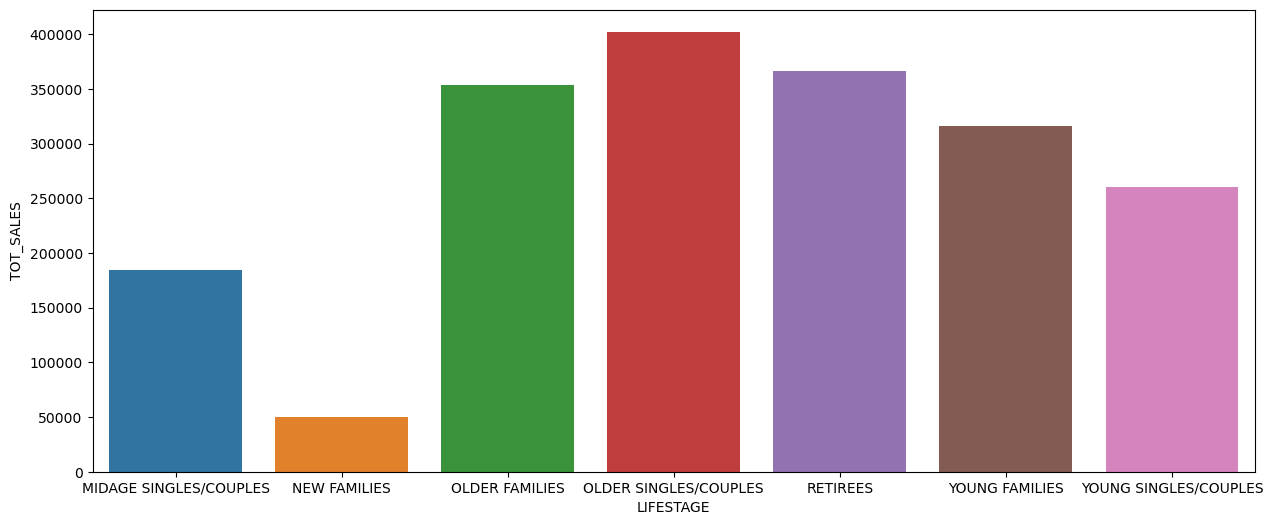

In [70]:
plt.figure(figsize=(15, 6))
sns.barplot(x=data_lifestage['LIFESTAGE'],y=data_lifestage['TOT_SALES'])
plt.show()

In [71]:
avg_data_1 = data_merge[['PROD_QTY', 'LIFESTAGE']].groupby('LIFESTAGE').mean()['PROD_QTY']

In [72]:
avg_data_2 = data_merge[['PROD_QTY', 'PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').mean()['PROD_QTY']

In [73]:
data_merge['PRICE_PER_QTY'] = data_merge['TOT_SALES']/data_merge['PROD_QTY']
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_QTY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,5.40
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,4.40
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,4.40
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,3.90


In [74]:
pd.DataFrame(avg_data_1).reset_index()

,LIFESTAGE,PROD_QTY
0,MIDAGE SINGLES/COUPLES,1.900478
1,NEW FAMILIES,1.856771
2,OLDER FAMILIES,1.954729
3,OLDER SINGLES/COUPLES,1.912719
4,RETIREES,1.892289
5,YOUNG FAMILIES,1.939828
6,YOUNG SINGLES/COUPLES,1.831762


In [75]:
pd.DataFrame(avg_data_2).reset_index()

,PREMIUM_CUSTOMER,PROD_QTY
0,Budget,1.909658
1,Mainstream,1.901841
2,Premium,1.912169
